In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
!pip install pycld2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904039 sha256=4afc631561fba70eea317d7c1e5108ec9910e8a203f3318f31f386c871fd2f05
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import pycld2 as cld2
import spacy
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [5]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download('wordnet')
!python -m spacy download de_core_news_sm
gernlp = spacy.load('de_core_news_sm')
engnlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package wordnet to /root/nltk_data...


2023-12-24 13:13:33.728151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 13:13:33.728198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 13:13:33.729365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-24 13:13:34.707392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 63.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [7]:
basefolder = "/content/drive/MyDrive/Greatlearning/Capstone/Dataset/"
germanfiles = ["commoncrawl_de_en.txt","europarl-v7_de_en.txt","news-commentary-v9_de_en.txt"]
engfiles = ["commoncrawl_en_de.txt","europarl-v7_en_de.txt","news-commentary-v9_en_de.txt"]
#germanfiles = ["news-commentary-v9_de_en.txt"]
#engfiles = ["news-commentary-v9_en_de.txt"]

### Useful functions for Preprocessing of data

In [8]:
import regex as re

def removestop(text,stopwords):
  raw = text.split()
  words = [word for word in raw if not word in stopwords]
  cleanwords = ' '.join(words)
  return cleanwords

def tolower(text):
  return text.lower()

def removespecial(text):
  text = text.strip()
  text = text.lower()
  te1 = re.sub("\s+"," ",text)
  te2 = re.sub('\n', '', te1)
  te3 = re.sub('\r', '', te2)
  te4 = re.sub('[0-9]','',te3)
  te5 = re.sub('()@%^&*-_,/\{}[?|$|.|!]','',te4)
  te6 = re.sub('[\p{Cc}\p{Cs}]+','',te5)
  te7 = re.sub('[^\w\s]','', te6)
  te8 = re.sub('_','',te7)
  return te8

def removeurl(text):
  return re.sub('https?://\S+|www\.\S+', '', text)

def clean_text(text):
    text = text.lower()
    pattern = re.compile(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?")
    text = re.sub(pattern,' ',text).strip()
    return text

## Function to read files

In [9]:
def read_files(fileloc, language):
  with open(fileloc,mode='rt',encoding='utf-8') as f:
    f_lines = f.readlines()
  df = pd.DataFrame(f_lines)
  dfc = df.set_axis([language],axis=1)
  #dfc[language] = dfc[language].str.decode("utf-8")
  return dfc

In [10]:
dfappend=pd.DataFrame()
for efile in range(len(germanfiles)):
  germanfilepath = basefolder+germanfiles[efile]
  print(germanfilepath)
  germandff = read_files(germanfilepath,"german")
  engfilepath = basefolder+engfiles[efile]
  engdff = read_files(engfilepath,"english")
  print(germandff.shape)
  print(engdff.shape)
  dfconcat = pd.concat([germandff, engdff],axis="columns")
  dfappend=pd.concat([dfappend, dfconcat])


/content/drive/MyDrive/Greatlearning/Capstone/Dataset/commoncrawl_de_en.txt
(2399123, 1)
(2399123, 1)
/content/drive/MyDrive/Greatlearning/Capstone/Dataset/europarl-v7_de_en.txt
(1920209, 1)
(1920209, 1)
/content/drive/MyDrive/Greatlearning/Capstone/Dataset/news-commentary-v9_de_en.txt
(201854, 1)
(201995, 1)


In [11]:
dfappend.shape

(4521327, 2)

In [12]:
dfappend.head()

,german,english
0,"iron cement ist eine gebrauchs-fertige Paste, ...",iron cement is a ready for use paste which is ...
1,Nach der Aushärtung schützt iron cement die Ko...,iron cement protects the ingot against the hot...
2,feuerfester Reparaturkitt für Feuerungsanlagen...,"a fire restant repair cement for fire places, ..."
3,Der Bau und die Reparatur der Autostraßen...\n,Construction and repair of highways and...\n
4,die Mitteilungen sollen den geschäftlichen kom...,An announcement must be commercial character.\n


## Exploratory Data analytics (EDA)

In [13]:
dfappend.isna().sum()

german     141
english      0
dtype: int64

In [14]:
dfappend.dropna(inplace=True)

In [15]:
dfappend.duplicated().sum()

45016

45,516 duplicate records found.

### Dedupe records

In [16]:
dfappend.drop_duplicates(subset=None, keep='first', inplace=True)
dfappend.shape

(4476170, 2)

###Take limited records due to computational limitations for the excercise

In [17]:
dfappend["engcount"]=dfappend['english'].str.split().str.len()

In [18]:
dfappend["engcount"].describe()

count    4.476170e+06
mean     2.310943e+01
std      1.497758e+01
min      0.000000e+00
25%      1.300000e+01
50%      2.000000e+01
75%      2.900000e+01
max      4.225000e+03
Name: engcount, dtype: float64

In [19]:
dfappend["gercount"]=dfappend['german'].str.split().str.len()
dfappend["gercount"].describe()

count    4.476170e+06
mean     2.143259e+01
std      1.330995e+01
min      0.000000e+00
25%      1.200000e+01
50%      1.900000e+01
75%      2.700000e+01
max      2.937000e+03
Name: gercount, dtype: float64

In [20]:
dfappend.dropna(inplace=True)

In [21]:
display(dfappend)

,german,english,engcount,gercount
0,"iron cement ist eine gebrauchs-fertige Paste, ...",iron cement is a ready for use paste which is ...,29,24
1,Nach der Aushärtung schützt iron cement die Ko...,iron cement protects the ingot against the hot...,12,14
2,feuerfester Reparaturkitt für Feuerungsanlagen...,"a fire restant repair cement for fire places, ...",12,8
3,Der Bau und die Reparatur der Autostraßen...\n,Construction and repair of highways and...\n,6,7
4,die Mitteilungen sollen den geschäftlichen kom...,An announcement must be commercial character.\n,6,8
...,...,...,...,...
201849,Das bleibt eine der größten Errungenschaften i...,It didn’t have to be this way.\n,7,10
201850,Gleichzeitig scheint sich Zumas revolutionäre ...,This past year has seen one missed opportunity...,10,26
201851,"In einer Region, wo die älteren Menschen sehr ...",South African president Thabo Mbeki convened n...,36,27
201852,Drei von zehn Südafrikanern sind jünger als 15...,Some African leaders – notably Ghana’s preside...,27,21


### As we see, we identify that 25-75 percentile of data has length of 13 to 29 words. We will exclude anything line that has less than 13 or greater than 29 words in the sentence

In [22]:
 dfappendfil = dfappend[((dfappend.engcount >= 10) & (dfappend.engcount <= 29))& ((dfappend.gercount >= 10) & (dfappend.gercount <= 29))]

In [23]:
 dfappendfil.count()


german      2487189
english     2487189
engcount    2487189
gercount    2487189
dtype: int64

### Record count reduced from 4475110 to 1934501. This is about 60% reduction in the data

### Stop word Removal - German & English

In [24]:
german_stop_words = stopwords.words('german')
english_stop_words = stopwords.words('english')

In [25]:
len(english_stop_words)

179

In [324]:
n=1000
dfsample = dfappendfil.sample(n)

In [325]:
dfsample['english_clean'] = dfsample['english'].apply(lambda x: removestop(x,english_stop_words))

In [326]:
dfsample['german_clean'] = dfsample['german'].apply(lambda x: removestop(x,german_stop_words))

### Remove special characters/ Lower case

In [327]:
dfsample['german_clean'] = dfsample['german_clean'].apply(lambda x: removespecial(x))
dfsample['english_clean'] = dfsample['english_clean'].apply(lambda x: removespecial(x))


In [328]:
display(dfsample)

,german,english,engcount,gercount,english_clean,german_clean
1915773,Zwischen der Europäischen Union und Macau best...,The bonds are old and strong between Europe an...,16,18,the bonds old strong europe macao making relat...,zwischen europäischen union macau bestehen lan...
1733987,"Wir müssen sicherstellen, daß die Türkei die f...",We do look to Turkey to meet the criteria whic...,19,17,we look turkey meet criteria we european union...,wir müssen sicherstellen türkei festgelegten k...
225817,Der Minister sagte außerdem zu mir: Wir können...,The minister also said to me: we cannot pay; w...,20,19,the minister also said me cannot pay money man...,der minister sagte außerdem mir wir zahlen feh...
1972910,"Es ist für sie selbstverständlich, dass ihre A...","They expect a High End system, which leaves no...",22,25,they expect high end system leaves nothing des...,es selbstverständlich anlage hinsichtlich tech...
534767,"This page was last modified 14:04, 19. Feb 200...","This page was last modified 14:04, 19 February...",12,12,this page last modified february redmarquis,this page last modified feb by redmarquis
...,...,...,...,...,...,...
144796,Neben dem Schaden an der Infrastruktur und dem...,Yet there is almost no recognition of this bas...,17,20,yet almost recognition basic truth governments...,neben schaden infrastruktur zynisch kollateral...
1055014,Dabei lernen Sie die Alpen aus einer ganz eige...,What a great way to get to know the Alps from ...,17,12,what great way get know alps viewpoint true local,dabei lernen sie alpen ganz eigenen regionalen...
1658921,Der Wirkungsgrad von Roots-Gebläsen ist niedri...,The efficiency of roots-blowers is lower than ...,16,16,the efficiency rootsblowers lower thoroughly d...,der wirkungsgrad rootsgebläsen niedriger gut a...
1409905,"Ich möchte dem Berichterstatter, Herrn Leichtf...","I would like to thank the rapporteur, Mr Leich...",20,18,i would like thank rapporteur mr leichtfried m...,ich möchte berichterstatter herrn leichtfried ...


In [329]:
dfsample = dfsample.astype(str).applymap(lambda x: str(x.replace('\n','')))

display(dfsample)

,german,english,engcount,gercount,english_clean,german_clean
1915773,Zwischen der Europäischen Union und Macau best...,The bonds are old and strong between Europe an...,16,18,the bonds old strong europe macao making relat...,zwischen europäischen union macau bestehen lan...
1733987,"Wir müssen sicherstellen, daß die Türkei die f...",We do look to Turkey to meet the criteria whic...,19,17,we look turkey meet criteria we european union...,wir müssen sicherstellen türkei festgelegten k...
225817,Der Minister sagte außerdem zu mir: Wir können...,The minister also said to me: we cannot pay; w...,20,19,the minister also said me cannot pay money man...,der minister sagte außerdem mir wir zahlen feh...
1972910,"Es ist für sie selbstverständlich, dass ihre A...","They expect a High End system, which leaves no...",22,25,they expect high end system leaves nothing des...,es selbstverständlich anlage hinsichtlich tech...
534767,"This page was last modified 14:04, 19. Feb 200...","This page was last modified 14:04, 19 February...",12,12,this page last modified february redmarquis,this page last modified feb by redmarquis
...,...,...,...,...,...,...
144796,Neben dem Schaden an der Infrastruktur und dem...,Yet there is almost no recognition of this bas...,17,20,yet almost recognition basic truth governments...,neben schaden infrastruktur zynisch kollateral...
1055014,Dabei lernen Sie die Alpen aus einer ganz eige...,What a great way to get to know the Alps from ...,17,12,what great way get know alps viewpoint true local,dabei lernen sie alpen ganz eigenen regionalen...
1658921,Der Wirkungsgrad von Roots-Gebläsen ist niedri...,The efficiency of roots-blowers is lower than ...,16,16,the efficiency rootsblowers lower thoroughly d...,der wirkungsgrad rootsgebläsen niedriger gut a...
1409905,"Ich möchte dem Berichterstatter, Herrn Leichtf...","I would like to thank the rapporteur, Mr Leich...",20,18,i would like thank rapporteur mr leichtfried m...,ich möchte berichterstatter herrn leichtfried ...


### On closer analysis of data it is  found that the german text has english in it. We need to remove those rows.

### We will be using "Pycld2" python library for this

In [330]:
def langdet(x):
  isReliable, textBytesFound, details = cld2.detect(x)

  return(details[0][1])

In [331]:
dfsample['is_eng'] = dfsample['english_clean'].apply(lambda x: langdet(x))

In [332]:
dfsample['is_ger'] = dfsample['german_clean'].apply(lambda x: langdet(x))

In [333]:
display(dfsample["is_ger"].value_counts())

de    942
en     28
un     21
fr      5
es      2
no      1
ms      1
Name: is_ger, dtype: int64

In [108]:
display(dfsample["is_eng"].value_counts())

en     48945
un       477
de       181
es        91
fr        85
it        46
nl        33
pt        24
sv         9
ru         9
cs         8
gl         7
da         6
bs         6
hr         6
pl         6
no         5
ca         5
ro         4
la         4
tr         4
fi         4
war        3
sco        3
id         3
ms         3
hu         3
uk         3
rw         2
lv         2
su         1
ceb        1
st         1
ar         1
el         1
af         1
xh         1
sk         1
vi         1
ga         1
tlh        1
ie         1
sa         1
Name: is_eng, dtype: int64

### We can see that some lines are 'un' unidentifiables and some are from other languages. We are going to kick out these records

In [334]:
dfappendclean = dfsample[(dfsample.is_eng == 'en') & (dfsample.is_ger =='de')]

In [335]:
dfappendclean.shape

(940, 8)

In [258]:
display(dfappendclean)

,german,english,engcount,gercount,english_clean,german_clean,is_eng,is_ger
1915773,Zwischen der Europäischen Union und Macau best...,The bonds are old and strong between Europe an...,16,18,the bonds old strong europe macao making relat...,zwischen europäischen union macau bestehen lan...,en,de
1733987,"Wir müssen sicherstellen, daß die Türkei die f...",We do look to Turkey to meet the criteria whic...,19,17,we look turkey meet criteria we european union...,wir müssen sicherstellen türkei festgelegten k...,en,de
225817,Der Minister sagte außerdem zu mir: Wir können...,The minister also said to me: we cannot pay; w...,20,19,the minister also said me cannot pay money man...,der minister sagte außerdem mir wir zahlen feh...,en,de
1972910,"Es ist für sie selbstverständlich, dass ihre A...","They expect a High End system, which leaves no...",22,25,they expect high end system leaves nothing des...,es selbstverständlich anlage hinsichtlich tech...,en,de
169628,Besuchen Sie den Games-Room mit über 300 Spiel...,"Get the Games Arcade with over 300 games, incl...",16,19,get games arcade games including rural racer ...,besuchen sie gamesroom spielen inklusive rura...,en,de
...,...,...,...,...,...,...,...,...
1303181,"Auch in dem Bericht wird daran erinnert, dass ...","As the report points out, a cross-sector appro...",26,29,as report points out crosssector approach need...,auch bericht daran erinnert eindeutig übergrei...,en,de
2122874,Durch unsere Eigenständigkeit und Unabhängigke...,This fact represents a great advantage when pr...,19,22,this fact represents great advantage providing...,durch eigenständigkeit unabhängigkeit zudem äu...,en,de
918942,Moderne wettbewerbsfähige Volkswirtschaften mü...,Modern competitive economies need to be flexib...,17,19,modern competitive economies need flexible mee...,moderne wettbewerbsfähige volkswirtschaften mü...,en,de
41833,In beiden Fällen waren ernsthafte politische M...,"They will have to be persuaded to leave, and, ...",16,29,they persuaded leave and work forced out,in beiden fällen ernsthafte politische meinung...,en,de


In [336]:
dfappendclean.drop(['german','english','engcount','gercount','is_eng','is_ger'], axis=1,inplace=True)

<ipython-input-336-fb8c03c3f680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfappendclean.drop(['german','english','engcount','gercount','is_eng','is_ger'], axis=1,inplace=True)


In [260]:
display(dfappendclean)

,english_clean,german_clean
1915773,the bonds old strong europe macao making relat...,zwischen europäischen union macau bestehen lan...
1733987,we look turkey meet criteria we european union...,wir müssen sicherstellen türkei festgelegten k...
225817,the minister also said me cannot pay money man...,der minister sagte außerdem mir wir zahlen feh...
1972910,they expect high end system leaves nothing des...,es selbstverständlich anlage hinsichtlich tech...
169628,get games arcade games including rural racer ...,besuchen sie gamesroom spielen inklusive rura...
...,...,...
1303181,as report points out crosssector approach need...,auch bericht daran erinnert eindeutig übergrei...
2122874,this fact represents great advantage providing...,durch eigenständigkeit unabhängigkeit zudem äu...
918942,modern competitive economies need flexible mee...,moderne wettbewerbsfähige volkswirtschaften mü...
41833,they persuaded leave and work forced out,in beiden fällen ernsthafte politische meinung...


In [337]:
def reducedstring(x):
  x_arr = x.split()
  y = ' '.join(x_arr[0:reducelen])
  return y


In [338]:
reducelen=10
dfappendclean['english_clean'] = dfappendclean['english_clean'].apply(lambda x: reducedstring(x))
dfappendclean['german_clean'] = dfappendclean['german_clean'].apply(lambda x: reducedstring(x))

<ipython-input-338-0792b084635b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfappendclean['english_clean'] = dfappendclean['english_clean'].apply(lambda x: reducedstring(x))
<ipython-input-338-0792b084635b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfappendclean['german_clean'] = dfappendclean['german_clean'].apply(lambda x: reducedstring(x))


In [339]:
display(dfappendclean)

,english_clean,german_clean
1915773,the bonds old strong europe macao making relat...,zwischen europäischen union macau bestehen lan...
1733987,we look turkey meet criteria we european union...,wir müssen sicherstellen türkei festgelegten k...
225817,the minister also said me cannot pay money man...,der minister sagte außerdem mir wir zahlen feh...
1972910,they expect high end system leaves nothing des...,es selbstverständlich anlage hinsichtlich tech...
169628,get games arcade games including rural racer i...,besuchen sie gamesroom spielen inklusive rural...
...,...,...
144796,yet almost recognition basic truth governments...,neben schaden infrastruktur zynisch kollateral...
1055014,what great way get know alps viewpoint true local,dabei lernen sie alpen ganz eigenen regionalen...
1658921,the efficiency rootsblowers lower thoroughly d...,der wirkungsgrad rootsgebläsen niedriger gut a...
1409905,i would like thank rapporteur mr leichtfried m...,ich möchte berichterstatter herrn leichtfried ...


### Word Cloud Plot

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [46]:
english = ' '.join(dfappendclean['english_clean'])

In [47]:
englishwordcloud = WordCloud(colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(english)

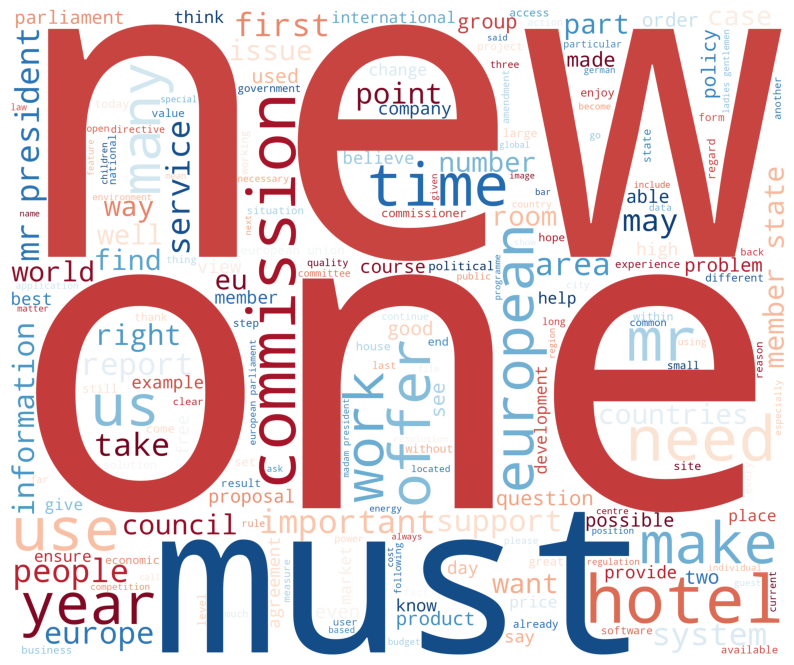

In [48]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(englishwordcloud)
plt.axis('off')
plt.show()

In [49]:
german = ' '.join(dfappendclean['german_clean'])
germanwordcloud = WordCloud(colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(german)

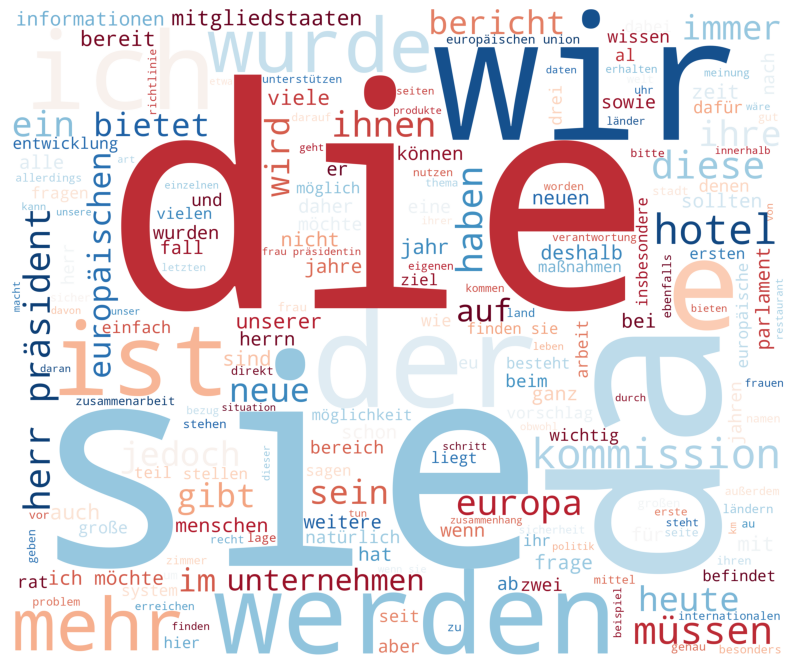

In [50]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(germanwordcloud)
plt.axis('off')
plt.show()

### Unique word count

In [51]:
from collections import Counter
words = english.split(' ')
c = Counter(words)
unique = [w for w in words if c[w] == 1]
print("Total words in the dataframe for English",len(words))
print("Total words in the dataframe for English",len(unique))



Total words in the dataframe for English 42091
Total words in the dataframe for English 6122


In [52]:
eng_mc= c.most_common(20)
eng_mc

[('the', 729),
 ('i', 550),
 ('we', 251),
 ('it', 231),
 ('also', 225),
 ('this', 211),
 ('in', 203),
 ('european', 176),
 ('mr', 166),
 ('would', 156),
 ('like', 140),
 ('one', 131),
 ('must', 130),
 ('hotel', 128),
 ('president', 128),
 ('new', 125),
 ('commission', 116),
 ('us', 105),
 ('time', 104),
 ('use', 98)]

In [53]:
words = german.split(' ')
c = Counter(words)
unique = [w for w in words if c[w] == 1]
print("Total words in the dataframe for German",len(words))
print("Total words in the dataframe for German",len(unique))


Total words in the dataframe for German 41758
Total words in the dataframe for German 10593


In [54]:
ger_mc= c.most_common(20)
ger_mc

[('sie', 612),
 ('die', 517),
 ('das', 265),
 ('ich', 263),
 ('wir', 232),
 ('es', 198),
 ('der', 184),
 ('werden', 162),
 ('in', 140),
 ('herr', 138),
 ('kommission', 132),
 ('ist', 128),
 ('wurde', 122),
 ('mehr', 118),
 ('hotel', 117),
 ('müssen', 114),
 ('europäischen', 114),
 ('möchte', 102),
 ('ihnen', 96),
 ('gibt', 89)]

In [117]:
from keras.preprocessing.text import Tokenizer
def wordtokenize(x):
    token = Tokenizer()
    token.fit_on_texts(x)
    return token.texts_to_sequences(x), token


### Converting to List from dataframe

In [56]:
english_words = []
german_words = []
english_words = dfappendclean["english_clean"].tolist()
german_words = dfappendclean["german_clean"].tolist()


In [340]:
from keras.preprocessing.sequence import pad_sequences
def pad(x, length=None):
    if length is None:
      length = max([len(text) for text in x])
    return pad_sequences(x,maxlen=length,padding='post')

def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = wordtokenize(x)
    preprocess_y, y_tk = wordtokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

In [341]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(dfappendclean["english_clean"],dfappendclean["german_clean"],test_size=.25,shuffle=True,random_state=101)

print(X_train_raw.shape)
print(X_test_raw.shape)
print(Y_train_raw.shape)
print(Y_test_raw.shape)

(705,)
(235,)
(705,)
(235,)


In [342]:
Y_train_raw.shape

(705,)

In [343]:
preproc_english_sentences, preproc_german_sentences, english_tokenizer, german_tokenizer = preprocess(X_train_raw, Y_train_raw)

In [344]:
preproc_english_sentences_test, preproc_german_sentences_test, english_tokenizer_test, german_tokenizer_test = preprocess(X_test_raw, Y_test_raw)

### Padding the sequence with Zeros to the keep the array length constant

In [345]:
max_english_sequence_length = preproc_english_sentences.shape[1]
max_german_sequence_length = preproc_german_sentences.shape[1]
english_vocab_size = len(english_tokenizer.word_index)+1
german_vocab_size = len(german_tokenizer.word_index)+1
print("Max English sentence length:", max_english_sequence_length)
print("Max German sentence length:", max_german_sequence_length)
print("English vocabulary size:", english_vocab_size)
print("German vocabulary size:", german_vocab_size)

Max English sentence length: 10
Max German sentence length: 10
English vocabulary size: 3319
German vocabulary size: 3957


## MODEL BUILDING

### MODEL #1 - BASIC RNN MODEL

### Split Train/Test data 75:25

In [346]:
X_train = preproc_english_sentences
X_test = preproc_english_sentences_test
Y_train = preproc_german_sentences
Y_test = preproc_german_sentences_test

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(705, 10)
(235, 10)
(705, 10, 1)
(235, 10, 1)


In [347]:
from keras.models import Model,Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional
from keras.layers import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras import optimizers,backend
import tensorflow as tf

In [352]:
def BasicRNNModel(input_shape, output_sequence_length, english_vocab_size, german_vocab_size):

    learning_rate = 0.001

    #Config Model
    inputs = Input(shape=input_shape[1:])
    hidden_layer = GRU(output_sequence_length, return_sequences=True)(inputs)
    outputs = TimeDistributed(Dense(german_vocab_size, activation='softmax'))(hidden_layer)
    #Create Model from parameters defined above
    model = Model(inputs=inputs, outputs=outputs)
    #rms = optimizers.RMSprop(lr=learning_rate)
    #model.compile(loss=sparse_categorical_crossentropy,optimizer=rms, metrics=['accuracy'])
    model.compile(loss=sparse_categorical_crossentropy,optimizer=Adam(learning_rate),metrics=['accuracy'])
    return model

In [353]:
def logits_to_text(logits, tokenizer):
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


In [354]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

(705, 10, 1)
(705, 10)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 gru_8 (GRU)                 (None, 10, 10)            390       
                                                                 
 time_distributed_8 (TimeDi  (None, 10, 3957)          43527     
 stributed)                                                      
                                                                 
Total params: 43917 (171.55 KB)
Trainable params: 43917 (171.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


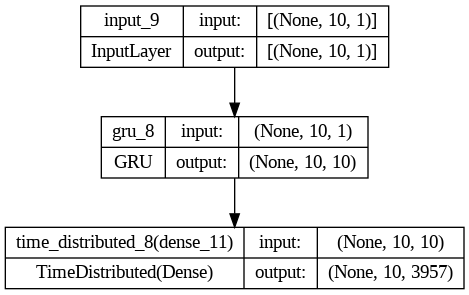

In [432]:
from tensorflow.keras.utils import plot_model

tmp_y = pad(X_train, max_german_sequence_length)
tmp_x = tmp_y.reshape((-1, Y_train.shape[-2], 1))
# Train the neural network
print(tmp_x.shape)
print(tmp_y.shape)
simple_rnn_model = BasicRNNModel(
        tmp_x.shape,
    max_german_sequence_length,
    english_vocab_size,
    german_vocab_size)
simple_rnn_model.summary()
plot_model(simple_rnn_model, to_file='model.png', show_shapes=True)

In [356]:
history = simple_rnn_model.fit(tmp_x,Y_train , batch_size=1024, epochs=100, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 8.2804 - accuracy: 1.7730e-04 - val_loss: 8.2791 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 8.2771 - accuracy: 5.3191e-04 - val_loss: 8.2775 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 8.2738 - accuracy: 7.0922e-04 - val_loss: 8.2759 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: 8.2704 - accuracy: 5.3191e-04 - val_loss: 8.2743 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 68ms/step - loss: 8.2670 - accuracy: 5.3191e-04 - val_loss: 8.2727 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 8.2635 - accuracy: 5.3191e-04 - val_loss: 8.2711 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 63ms/step - loss: 8.2600 - accuracy: 5.3191e-04 - val_loss: 

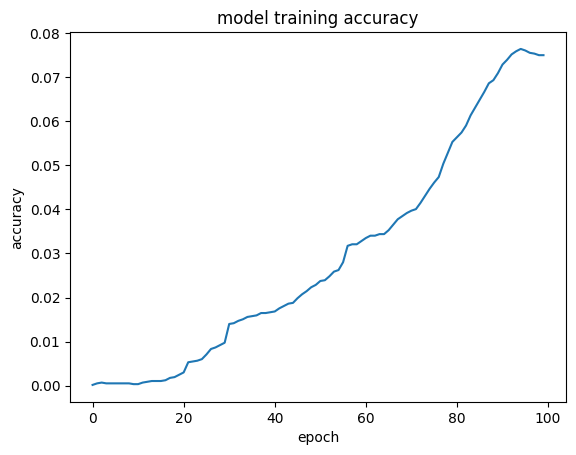

In [357]:
plt.plot(history.history['accuracy'])
# setting the title
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

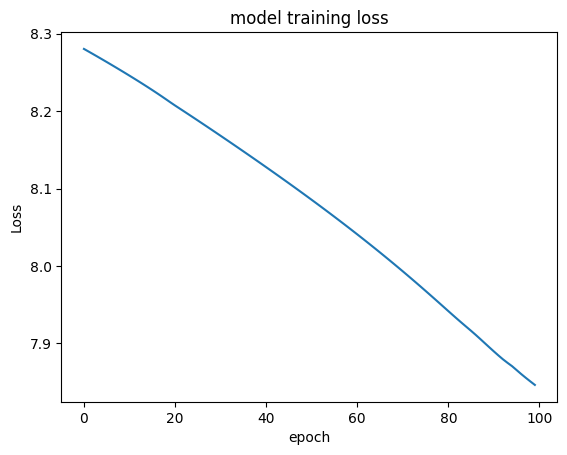

In [358]:
# accessing the loss from the his variable
plt.plot(history.history['loss'])
# setting the title
plt.title('model training loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [359]:
for i in range(5):
  print(dfappendclean["english_clean"].iloc[i])
  print(dfappendclean["german_clean"].iloc[i])
  print(logits_to_text(simple_rnn_model.predict(tmp_x[:i+1])[0], german_tokenizer))
  print('\n')

the bonds old strong europe macao making relationship special one
zwischen europäischen union macau bestehen langjährige feste bindungen verhältnis besonderen
1/1 [==============================] - 0s 295ms/step
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


we look turkey meet criteria we european union lay membership
wir müssen sicherstellen türkei festgelegten kriterien mitgliedschaft europäischen union erfüllt
1/1 [==============================] - 0s 19ms/step
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


the minister also said me cannot pay money man crossings
der minister sagte außerdem mir wir zahlen fehlt geld besetzung
1/1 [==============================] - 0s 18ms/step
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


they expect high end system leaves nothing desired concerning technological
es selbstverständlich anlage hinsichtlich technologischen gehaltes zuverlässigen funktion werterhaltes viele
1/1 [============================

In [382]:
from nltk.translate.bleu_score import corpus_bleu

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
def predict_sequence(model, tokenizer, source):
    prediction = model.predict(source, verbose=0)[0]

    integers = [np.argmax(vector) for vector in prediction]
    target = list()
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

def evaluate_model(model, tokenizer, sources, raw_dataset_input, raw_dataset_output):
    actual, predicted = list(), list()
    for i, source in enumerate(sources):

        # Translating encoded source text
        source = source.reshape((1, source.shape[0],1))
        translation = predict_sequence(model, tokenizer, source)
        raw_src = raw_dataset_input.iloc[i]
        raw_target = raw_dataset_output.iloc[i]
        if i < 10:
            print("The English sentence is:", raw_src)
            print("The German sentence is:", raw_target)
            print("The predicted sentence is:", translation)
            print("*"*50)
        actual.append([raw_target.split()])
        predicted.append(translation.split())
        m= i%100
        if m==0:
          print(i)

    # Calculating BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [363]:
evaluate_model(simple_rnn_model, german_tokenizer, tmp_y, X_train_raw, Y_train_raw)

The English sentence is: this predominantly refers copying translating microfiches transfer online services internet
The German sentence is: das gilt insbesondere vervielfältigungen übersetzungen mikroverfilmungen aufnahme onlinedienste internetangebote einspeisung
The predicted sentence is: 
**************************************************
0
The English sentence is: during second world war abbazia san faustino san faustino headquarter
The German sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
The predicted sentence is: es es
**************************************************
The English sentence is: this highly individual form communication enabled newsletter technologywork munich based
The German sentence is: ziel aktivitäten es produkten herstellers deutlich höhere umsätze beim handelspartner
The predicted sentence is: 
**************************************************
The English sentence is: justweb srl also avail collaborati

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

###<b>Observation:</b>

* Basic RNN model is trained on 50,000 sample data.
* Sentence length was restricted to 10 words
* Model was run for 30 epochs
* Hyper parameter: Optimizer = Adam, LR = 0.0005
* Model accuracy for both train and validation is around 9%
* Model loss settled around 8%
* Model prediction is off and produced just a static o/p with the most common German word of 'die' or 'sie'
* BLEU Scores are close to 0


#<B> MILESTONE 2

### MODEL 2 - RNN Model With embedding

In [401]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

(705, 10)
(705, 10)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 10, 10)            33190     
                                                                 
 gru_7 (GRU)                 (None, 10, 10)            660       
                                                                 
 time_distributed_7 (TimeDi  (None, 10, 3957)          43527     
 stributed)                                                      
                                                                 
Total params: 77377 (302.25 KB)
Trainable params: 77377 (302.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


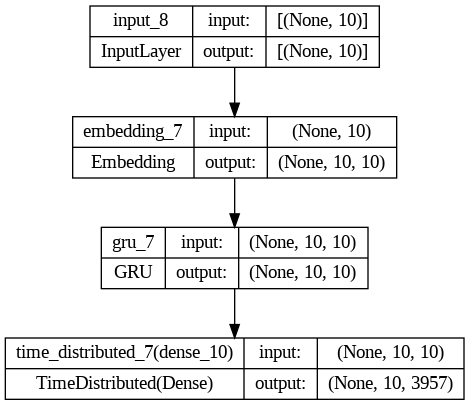

In [427]:
def embed_model(input_shape, output_sequence_length, english_vocab_size, german_vocab_size):

    learning_rate = 1e-2
    inputs = Input(shape=input_shape[1:])
    embedding_layer = Embedding(input_dim=english_vocab_size,
                                output_dim=output_sequence_length,
                                mask_zero=False)(inputs)
    hidden_layer = GRU(output_sequence_length, return_sequences=True)(embedding_layer)
    outputs = TimeDistributed(Dense(german_vocab_size, activation='softmax'))(hidden_layer)

    #Create Model from parameters defined above
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

tmp_y = pad(X_train, Y_train.shape[1])
tmp_x = tmp_y.reshape((-1, preproc_german_sentences.shape[-2]))
print(tmp_x.shape)
print(tmp_y.shape)

# Train the neural network
embed_rnn_model = embed_model(
        tmp_x.shape,
    max_german_sequence_length,
    english_vocab_size,
    german_vocab_size)
embed_rnn_model.summary()
plot_model(embed_rnn_model, to_file='model.png', show_shapes=True)

In [403]:
history = embed_rnn_model.fit(tmp_x, Y_train, batch_size=264, epochs=100, validation_split=0.2)
print(logits_to_text(embed_rnn_model.predict(tmp_x[:1])[0], german_tokenizer))

Epoch 1/100
3/3 [==============================] - 2s 315ms/step - loss: 8.2832 - accuracy: 0.0034 - val_loss: 8.2781 - val_accuracy: 0.1028
Epoch 2/100
3/3 [==============================] - 0s 121ms/step - loss: 8.2597 - accuracy: 0.0766 - val_loss: 8.2670 - val_accuracy: 0.1028
Epoch 3/100
3/3 [==============================] - 0s 121ms/step - loss: 8.2257 - accuracy: 0.0764 - val_loss: 8.2496 - val_accuracy: 0.1028
Epoch 4/100
3/3 [==============================] - 0s 124ms/step - loss: 8.1674 - accuracy: 0.0764 - val_loss: 8.2239 - val_accuracy: 0.1028
Epoch 5/100
3/3 [==============================] - 0s 124ms/step - loss: 8.0689 - accuracy: 0.0764 - val_loss: 8.2001 - val_accuracy: 0.1028
Epoch 6/100
3/3 [==============================] - 0s 120ms/step - loss: 7.9283 - accuracy: 0.0764 - val_loss: 8.2247 - val_accuracy: 0.1028
Epoch 7/100
3/3 [==============================] - 0s 117ms/step - loss: 7.7980 - accuracy: 0.0764 - val_loss: 8.3028 - val_accuracy: 0.1028
Epoch 8/100
3

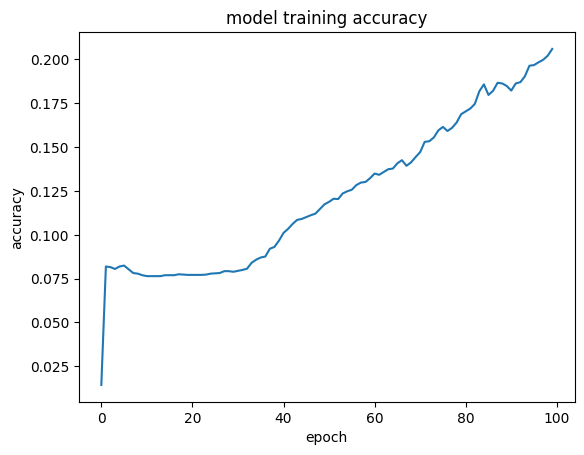

In [398]:
plt.plot(history.history['accuracy'])
# setting the title
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

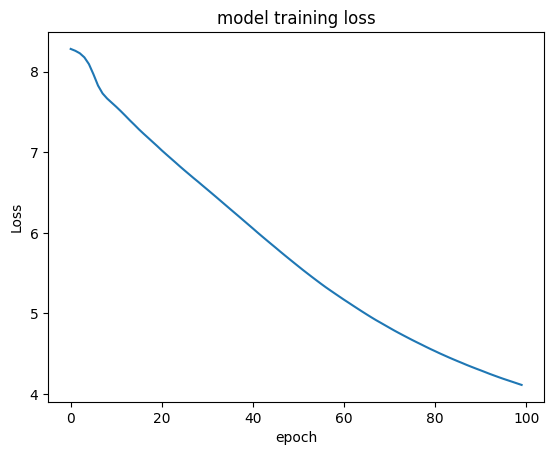

In [399]:
# accessing the loss from the his variable
plt.plot(history.history['loss'])
# setting the title
plt.title('model training loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [425]:
for i in range(1):
  print(dfappendclean["english_clean"].iloc[i])
  print(dfappendclean["german_clean"].iloc[i])
  print(logits_to_text(embed_rnn_model.predict(tmp_x[:i+1])[0], german_tokenizer))
  print('\n')

the bonds old strong europe macao making relationship special one
zwischen europäischen union macau bestehen langjährige feste bindungen verhältnis besonderen
1/1 [==============================] - 0s 307ms/step
danach obwohl wird völker frage umweltaktionsprogramm frage chromstar letzter stützt




In [411]:
tmp_y.shape

(705, 10)

In [416]:
evaluate_model(embed_rnn_model, german_tokenizer, tmp_y, X_train_raw, Y_train_raw)

The English sentence is: this predominantly refers copying translating microfiches transfer online services internet
The German sentence is: das gilt insbesondere vervielfältigungen übersetzungen mikroverfilmungen aufnahme onlinedienste internetangebote einspeisung
The predicted sentence is: ungewöhnliche tor nephilim leistungsstarken redezeit arbeitskräfte kieler verschmelzen amauta persãnlicher
**************************************************
0
The English sentence is: during second world war abbazia san faustino san faustino headquarter
The German sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
The predicted sentence is: moderner cocktail schuldentilgung gerecht schadenspunkte nephilim einnahmen dämmerung gewinnt teilweise
**************************************************
The English sentence is: this highly individual form communication enabled newsletter technologywork munich based
The German sentence is: ziel aktivitäten es 

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

###<b>Observation:</b>

* RNN model with embedding is trained on 1000 sample data.
* Sentence length was restricted to 10 words
* Model was run for 100 epochs
* Hyper parameter: Optimizer = Adam, LR = 0.001
* Model accuracy for both train and validation is around 20%
* Model loss settled around 4%
* Model prediction is off but better than the basic RNN model without embedding
* BLEU Scores are close to 0 but slightly better

## <b>LSTM MODEL WITH EMBEDDING</b>

In [443]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 512)           1699328   
                                                                 
 lstm_6 (LSTM)               (None, 512)               2099200   
                                                                 
 repeat_vector_3 (RepeatVec  (None, 10, 512)           0         
 tor)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 10, 512)           2099200   
                                                                 
 dense_12 (Dense)            (None, 10, 3957)          2029941   
                                                                 
Total params: 7927669 (30.24 MB)
Trainable params: 7927669 (30.24 MB)
Non-trainable params: 0 (0.00 Byte)
______________

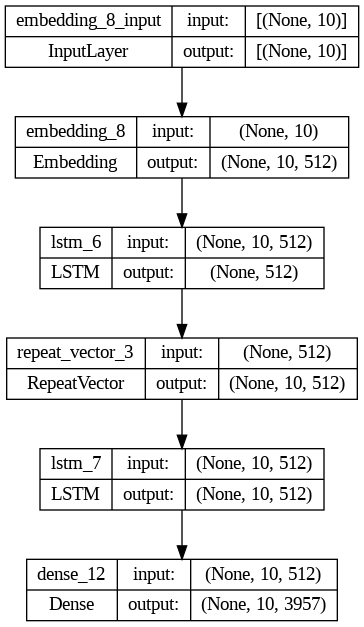

In [444]:
# model compilation
#model = define_model(german_vocab_size, english_vocab_size, max_german_sequence_length, max_english_sequence_length, 512)
LSTM_Embed = define_model(english_vocab_size, german_vocab_size, max_english_sequence_length, max_german_sequence_length, 512)
rms = optimizers.RMSprop(lr=0.001)
LSTM_Embed.compile(optimizer=rms, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
LSTM_Embed.summary()
plot_model(LSTM_Embed, to_file='model.png', show_shapes=True)


In [445]:
#history = model.fit(preproc_german_sentences, preproc_english_sentences.reshape(preproc_english_sentences.shape[0], preproc_english_sentences.shape[1], 1),epochs=30, batch_size=512, validation_split = 0.2, verbose=1)
history = LSTM_Embed.fit(X_train, Y_train.reshape(Y_train.shape[0], Y_train.shape[1], 1),epochs=300, batch_size=264, validation_split = 0.2, verbose=1)

Epoch 1/300
3/3 [==============================] - 7s 860ms/step - loss: 8.2817 - accuracy: 0.0395 - val_loss: 8.2737 - val_accuracy: 0.1028
Epoch 2/300
3/3 [==============================] - 0s 116ms/step - loss: 8.2732 - accuracy: 0.0764 - val_loss: 8.2608 - val_accuracy: 0.1028
Epoch 3/300
3/3 [==============================] - 0s 111ms/step - loss: 8.2607 - accuracy: 0.0764 - val_loss: 8.2320 - val_accuracy: 0.1028
Epoch 4/300
3/3 [==============================] - 0s 106ms/step - loss: 8.2313 - accuracy: 0.0764 - val_loss: 8.1174 - val_accuracy: 0.1028
Epoch 5/300
3/3 [==============================] - 0s 110ms/step - loss: 8.0781 - accuracy: 0.0764 - val_loss: 7.6735 - val_accuracy: 0.1028
Epoch 6/300
3/3 [==============================] - 0s 103ms/step - loss: 7.8340 - accuracy: 0.0764 - val_loss: 7.7626 - val_accuracy: 0.1028
Epoch 7/300
3/3 [==============================] - 0s 105ms/step - loss: 7.7884 - accuracy: 0.0764 - val_loss: 7.6642 - val_accuracy: 0.1028
Epoch 8/300
3

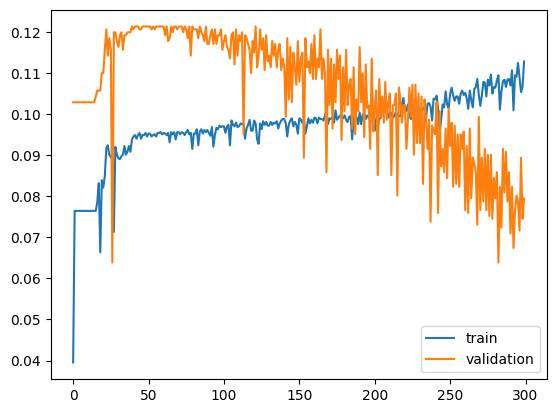

In [446]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.show()


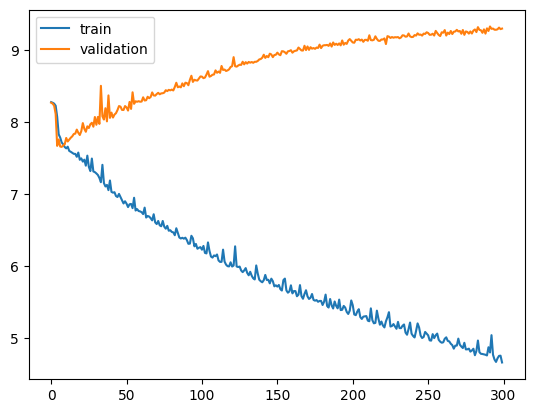

In [447]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()


In [448]:
for i in range(1):
  print(dfappendclean["english_clean"].iloc[i])
  print(dfappendclean["german_clean"].iloc[i])
  print(logits_to_text(LSTM_Embed.predict(tmp_x[:i+1])[0], german_tokenizer))
  print('\n')

the bonds old strong europe macao making relationship special one
zwischen europäischen union macau bestehen langjährige feste bindungen verhältnis besonderen
1/1 [==============================] - 1s 1s/step
der sie wurde parlament hohe umsetzung ab tun haben <PAD>




In [449]:
evaluate_model(LSTM_Embed, german_tokenizer, tmp_y, X_train_raw, Y_train_raw)

The English sentence is: this predominantly refers copying translating microfiches transfer online services internet
The German sentence is: das gilt insbesondere vervielfältigungen übersetzungen mikroverfilmungen aufnahme onlinedienste internetangebote einspeisung
The predicted sentence is: der sie wurde parlament hohe umsetzung ab tun haben
**************************************************
0
The English sentence is: during second world war abbazia san faustino san faustino headquarter
The German sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
The predicted sentence is: die sie wurde immer sie denen davor tun haben
**************************************************
The English sentence is: this highly individual form communication enabled newsletter technologywork munich based
The German sentence is: ziel aktivitäten es produkten herstellers deutlich höhere umsätze beim handelspartner
The predicted sentence is: der sie wurde frage 

###<b>Observation:</b>

* LSTM model with embedding is trained on 1000 sample data.
* Sentence length was restricted to 10 words
* Model was run for 300 epochs
* Hyper parameter: Optimizer = Adam, LR = 0.001
* Model accuracy for both train and validation is around 20%
* Loss % between Train and Vaidation is significantly different. It is 4.5% for train and about 9% for validation. This is not a good
* Accuracy is around 11% for train and somewhat less for validaiton at 9%
* Model prediction is some what ok but better than the other models before without embedding
* BLEU Scores are about 0.4 and better

## <b> MODEL: Bidirectional RNN </b>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 20)            780       
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 10, 3957)          83097     
 ributed)                                                        
                                                                 
Total params: 83877 (327.64 KB)
Trainable params: 83877 (327.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


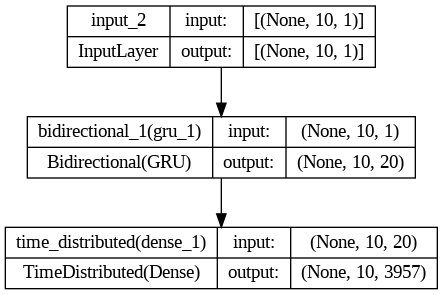

In [470]:
def bd_model(input_shape, output_sequence_length, english_vocab_size, german_vocab_size):
    learning_rate = 0.001

    inputs = Input(shape=input_shape[1:])
    hidden_layer = Bidirectional(GRU(output_sequence_length, return_sequences=True))(inputs)
    outputs = TimeDistributed(Dense(german_vocab_size, activation='softmax'))(hidden_layer)

    #Create Model from parameters defined above
    model = Model(inputs=inputs, outputs=outputs)
    rms = optimizers.RMSprop(lr=learning_rate)
    #model.compile(loss=sparse_categorical_crossentropy,optimizer=rms, metrics=['accuracy'])
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=rms,
                  metrics=['accuracy'])

    return model

tmp_y = pad(X_train, max_german_sequence_length)
tmp_x = tmp_y.reshape((-1, Y_train.shape[-2], 1))

bd_mod = bd_model(
        tmp_x.shape,
    max_german_sequence_length,
    english_vocab_size,
    german_vocab_size)
bd_mod.summary()
plot_model(bd_mod, to_file='model.png', show_shapes=True)

In [471]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [472]:
history = bd_mod.fit(tmp_x, Y_train, batch_size=512, epochs=250, validation_split=0.2)
print(logits_to_text(bd_mod.predict(tmp_x[:1])[0], german_tokenizer))

Epoch 1/250
2/2 [==============================] - 3s 679ms/step - loss: 8.2841 - accuracy: 0.0000e+00 - val_loss: 8.2778 - val_accuracy: 7.0922e-04
Epoch 2/250
2/2 [==============================] - 0s 47ms/step - loss: 8.2712 - accuracy: 7.0922e-04 - val_loss: 8.2733 - val_accuracy: 0.0021
Epoch 3/250
2/2 [==============================] - 0s 47ms/step - loss: 8.2611 - accuracy: 0.0064 - val_loss: 8.2691 - val_accuracy: 0.0277
Epoch 4/250
2/2 [==============================] - 0s 47ms/step - loss: 8.2515 - accuracy: 0.0199 - val_loss: 8.2662 - val_accuracy: 0.0326
Epoch 5/250
2/2 [==============================] - 0s 43ms/step - loss: 8.2431 - accuracy: 0.0241 - val_loss: 8.2637 - val_accuracy: 0.0362
Epoch 6/250
2/2 [==============================] - 0s 44ms/step - loss: 8.2352 - accuracy: 0.0255 - val_loss: 8.2611 - val_accuracy: 0.0426
Epoch 7/250
2/2 [==============================] - 0s 43ms/step - loss: 8.2275 - accuracy: 0.0303 - val_loss: 8.2590 - val_accuracy: 0.0418
Epoch 8

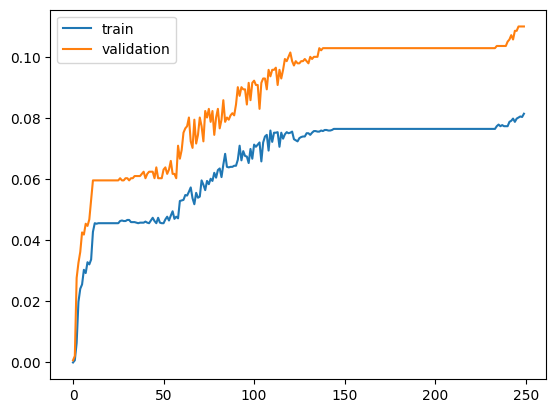

In [473]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.show()

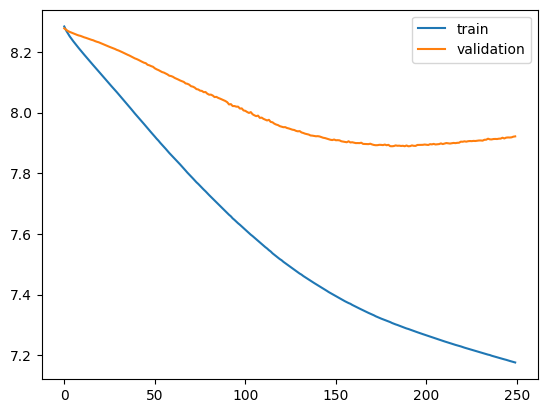

In [474]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [475]:
for i in range(1):
  print(dfappendclean["english_clean"].iloc[i])
  print(dfappendclean["german_clean"].iloc[i])
  print(logits_to_text(bd_mod.predict(tmp_x[:i+1])[0], german_tokenizer))
  print('\n')

the bonds old strong europe macao making relationship special one
zwischen europäischen union macau bestehen langjährige feste bindungen verhältnis besonderen
1/1 [==============================] - 0s 19ms/step
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>




In [476]:
evaluate_model(bd_mod, german_tokenizer, tmp_y, X_train_raw, Y_train_raw)

The English sentence is: this predominantly refers copying translating microfiches transfer online services internet
The German sentence is: das gilt insbesondere vervielfältigungen übersetzungen mikroverfilmungen aufnahme onlinedienste internetangebote einspeisung
The predicted sentence is: 
**************************************************
0
The English sentence is: during second world war abbazia san faustino san faustino headquarter
The German sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
The predicted sentence is: 
**************************************************
The English sentence is: this highly individual form communication enabled newsletter technologywork munich based
The German sentence is: ziel aktivitäten es produkten herstellers deutlich höhere umsätze beim handelspartner
The predicted sentence is: 
**************************************************
The English sentence is: justweb srl also avail collaboration ex

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

###<b>Observation:</b>

* BiDirectional RNN model with embedding is trained on 1000 sample data.
* Sentence length was restricted to 10 words
* Model was run for 250 epochs
* Hyper parameter: Optimizer = RMS, LR = 0.001
* Model accuracy for both train and validation is around 10%
* Loss % between Train and Vaidation is significantly different. It is 4.5% for train and about 9% for validation. This is not a good
* Accuracy is around 7.2% for train and somewhat less for validaiton at 8%
* Model prediction is not good when compared to other models embedding
* BLEU Scores are about 0 which is not good

##<b> MODEL: Bidirectional LSTM</b>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 512)           1699328   
                                                                 
 bidirectional_2 (Bidirecti  (None, 1024)              4198400   
 onal)                                                           
                                                                 
 repeat_vector_1 (RepeatVec  (None, 10, 1024)          0         
 tor)                                                            
                                                                 
 bidirectional_3 (Bidirecti  (None, 10, 1024)          6295552   
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 10, 3957)          4055925   
                                                      

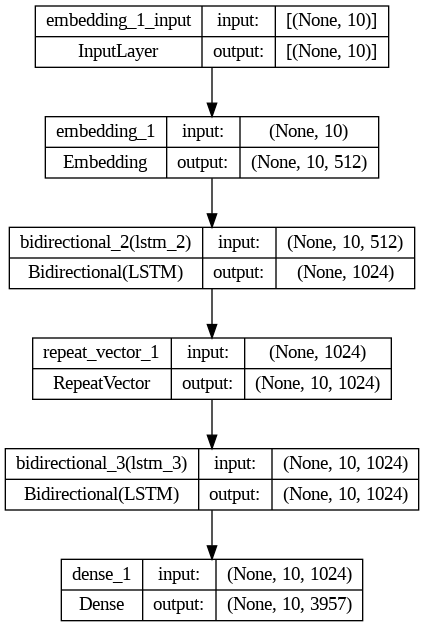

In [478]:
def bidirectional_LSTM_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(Bidirectional(LSTM(units)))
      model.add(RepeatVector(out_timesteps))
      model.add(Bidirectional(LSTM(units, return_sequences=True)))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

# model compilation
#model = define_model(german_vocab_size, english_vocab_size, max_german_sequence_length, max_english_sequence_length, 512)
bd_lstm = bidirectional_LSTM_model(english_vocab_size, german_vocab_size, max_english_sequence_length, max_german_sequence_length, 512)
rms = optimizers.RMSprop(lr=0.001)
bd_lstm.compile(optimizer=rms, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
bd_lstm.summary()
plot_model(bd_lstm, to_file='model.png', show_shapes=True)


In [480]:
history = bd_lstm.fit(X_train, Y_train.reshape(preproc_german_sentences.shape[0], Y_train.shape[1], 1),epochs=300, batch_size=264, validation_split = 0.2, verbose=1)

Epoch 1/300
3/3 [==============================] - 12s 2s/step - loss: 8.2809 - accuracy: 0.0395 - val_loss: 8.2700 - val_accuracy: 0.1028
Epoch 2/300
3/3 [==============================] - 0s 138ms/step - loss: 8.2689 - accuracy: 0.0764 - val_loss: 8.2504 - val_accuracy: 0.1028
Epoch 3/300
3/3 [==============================] - 0s 122ms/step - loss: 8.2494 - accuracy: 0.0764 - val_loss: 8.2029 - val_accuracy: 0.1028
Epoch 4/300
3/3 [==============================] - 0s 124ms/step - loss: 8.1976 - accuracy: 0.0764 - val_loss: 7.9696 - val_accuracy: 0.1028
Epoch 5/300
3/3 [==============================] - 0s 121ms/step - loss: 7.9290 - accuracy: 0.0764 - val_loss: 7.8758 - val_accuracy: 0.1028
Epoch 6/300
3/3 [==============================] - 0s 121ms/step - loss: 7.8594 - accuracy: 0.0764 - val_loss: 7.6386 - val_accuracy: 0.1043
Epoch 7/300
3/3 [==============================] - 0s 126ms/step - loss: 7.6907 - accuracy: 0.0794 - val_loss: 7.5814 - val_accuracy: 0.1099
Epoch 8/300
3/3

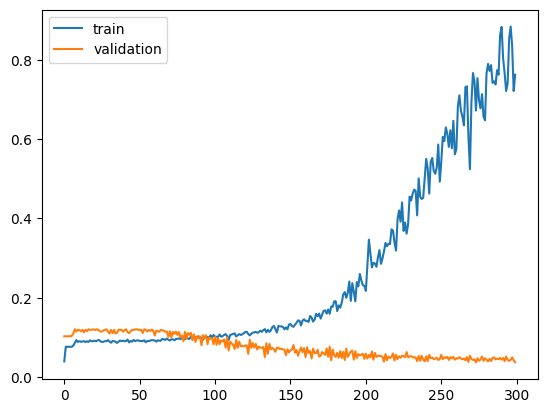

In [481]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.show()


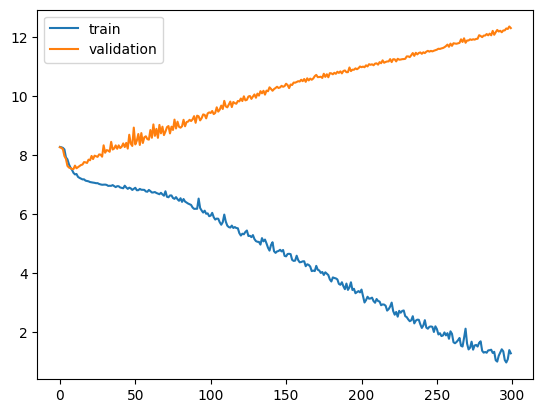

In [482]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [484]:
for i in range(3):
  print(dfappendclean["english_clean"].iloc[i])
  print(dfappendclean["german_clean"].iloc[i])
  print(logits_to_text(bd_lstm.predict(tmp_x[:i+1])[0], german_tokenizer))
  print('\n')

the bonds old strong europe macao making relationship special one
zwischen europäischen union macau bestehen langjährige feste bindungen verhältnis besonderen
1/1 [==============================] - 0s 22ms/step
wir aspekt beziehung ständig übersetzungen mikroverfilmungen organisation onlinedienste internetangebote einspeisung


we look turkey meet criteria we european union lay membership
wir müssen sicherstellen türkei festgelegten kriterien mitgliedschaft europäischen union erfüllt
1/1 [==============================] - 0s 23ms/step
wir aspekt beziehung ständig übersetzungen mikroverfilmungen organisation onlinedienste internetangebote einspeisung


the minister also said me cannot pay money man crossings
der minister sagte außerdem mir wir zahlen fehlt geld besetzung
1/1 [==============================] - 0s 33ms/step
wir aspekt beziehung ständig übersetzungen mikroverfilmungen organisation onlinedienste internetangebote einspeisung




In [485]:
evaluate_model(bd_lstm, german_tokenizer, tmp_y, X_train_raw, Y_train_raw)

The English sentence is: this predominantly refers copying translating microfiches transfer online services internet
The German sentence is: das gilt insbesondere vervielfältigungen übersetzungen mikroverfilmungen aufnahme onlinedienste internetangebote einspeisung
The predicted sentence is: wir aspekt beziehung ständig übersetzungen mikroverfilmungen organisation onlinedienste internetangebote einspeisung
**************************************************
0
The English sentence is: during second world war abbazia san faustino san faustino headquarter
The German sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
The predicted sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
**************************************************
The English sentence is: this highly individual form communication enabled newsletter technologywork munich based
The German sentence is: ziel aktivitäten es produk

###<b>Observation:</b>

* BiDirectional LSTM model with embedding is trained on 1000 sample data.
* Sentence length was restricted to 10 words
* Model was run for 300 epochs
* Hyper parameter: Optimizer = ADAM, LR = 0.001
* Model accuracy for train is around 10%
* Loss % between Train and Vaidation is significantly different. It is 2% for train and about 12% for validation. This indicates that the  model is overfit and would perform bad for test
* Accuracy is around 8% for train and very less at 1% for validation dataset
* Model prediction is very good when compared to other models before  
* BLEU Scores are about 0.6 which is good

## ENCODER - DECODER MODEL  (STRETCH GOAL)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 gru_4 (GRU)                 (None, 10)                390       
                                                                 
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 repeat_vector_4 (RepeatVec  (None, 10, 128)           0         
 tor)                                                            
                                                                 
 gru_5 (GRU)                 (None, 10, 128)           99072     
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 3957)          510453    
 stributed)                                                

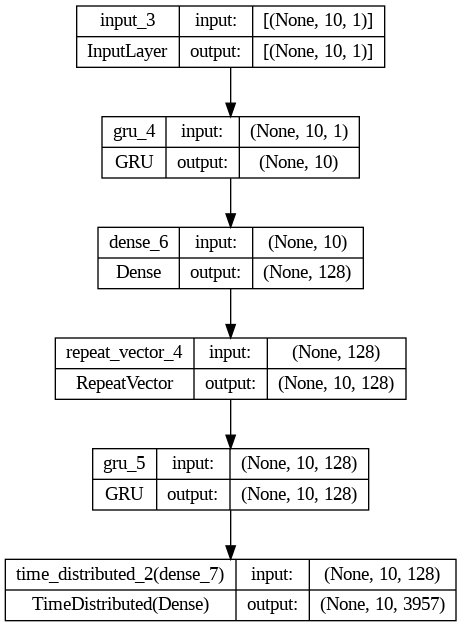

In [488]:
def encdec_model(input_shape, output_sequence_length, english_vocab_size, german_vocab_size):

    learning_rate = 1e-2
    latent_dim = 128

    # Encoder
    encoder_input = Input(shape=input_shape[1:])
    encoder_gru = GRU(output_sequence_length)(encoder_input)
    encode_output = Dense(latent_dim,activation='relu')(encoder_gru)

    # Config Decode
    decoder_input = RepeatVector(output_sequence_length)(encode_output)
    decoder_gru = GRU(latent_dim,return_sequences=True)(decoder_input)
    output_layer = TimeDistributed(Dense(german_vocab_size,activation='softmax'))
    outputs = output_layer(decoder_gru)
    model = Model(inputs=encoder_input, outputs=outputs)
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

tmp_y = pad(X_train, max_german_sequence_length)
tmp_x = tmp_y.reshape((-1, preproc_german_sentences.shape[-2], 1))

ed_mod = encdec_model(
        tmp_x.shape,
    max_german_sequence_length,
    english_vocab_size,
    german_vocab_size)
ed_mod.summary()
plot_model(ed_mod, to_file='model.png', show_shapes=True)


In [492]:
history = ed_mod.fit(tmp_x, Y_train, batch_size=512, epochs=100, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 90ms/step - loss: 3.5028 - accuracy: 0.1754 - val_loss: 11.9798 - val_accuracy: 0.0879
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 3.4840 - accuracy: 0.1766 - val_loss: 11.9740 - val_accuracy: 0.0929
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 3.4446 - accuracy: 0.1856 - val_loss: 11.9859 - val_accuracy: 0.0936
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 3.4335 - accuracy: 0.1759 - val_loss: 11.9948 - val_accuracy: 0.0943
Epoch 5/100
2/2 [==============================] - 0s 45ms/step - loss: 3.3984 - accuracy: 0.1840 - val_loss: 12.0160 - val_accuracy: 0.0936
Epoch 6/100
2/2 [==============================] - 0s 45ms/step - loss: 3.3775 - accuracy: 0.1918 - val_loss: 12.0100 - val_accuracy: 0.0929
Epoch 7/100
2/2 [==============================] - 0s 50ms/step - loss: 3.3658 - accuracy: 0.1954 - val_loss: 12.0428 - val_accuracy: 0.0872
Epoch 8/100
2

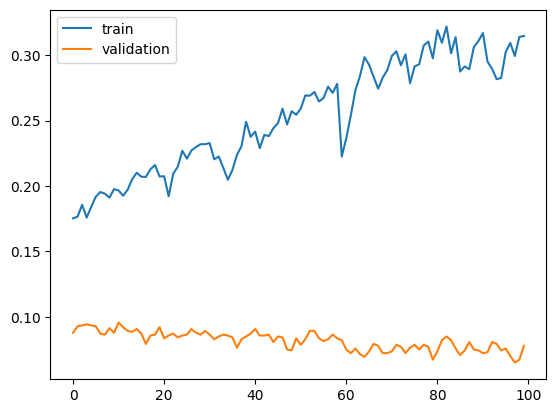

In [493]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.show()

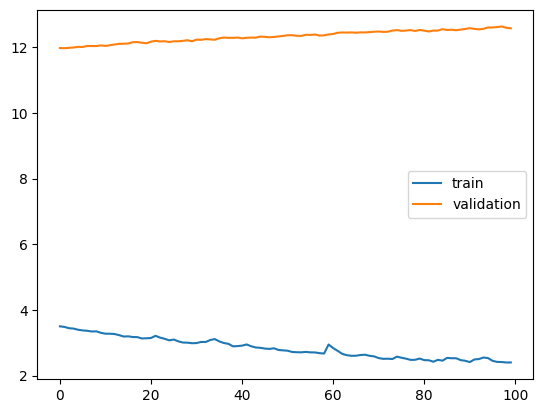

In [494]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
for i in range(5):
  print(english_words[i])
  print(german_words[i])
  print(logits_to_text(ed_mod.predict(tmp_x[:i+1])[0], german_tokenizer))
  print('\n')

as reliable partner zf takes
als verlässlicher partner nehmen verantwortung
1/1 [==============================] - 0s 21ms/step
sie sie demokraten gehirns viertel


phoenician colonization starting th century
die phönizische kolonisierung ab jahrhundert
1/1 [==============================] - 0s 22ms/step
sie sie demokraten gehirns viertel


we must run headlong common
man hals kopf völlig mechanistischer
1/1 [==============================] - 0s 26ms/step
sie sie demokraten gehirns viertel


as see example situations rely
wie obigem beispiel erkennen können
1/1 [==============================] - 0s 22ms/step
sie sie demokraten gehirns viertel


i believe that well member
ich glaube mitgliedstaaten namen eubürger
1/1 [==============================] - 0s 23ms/step
sie sie demokraten gehirns viertel




In [496]:
evaluate_model(bd_mod, german_tokenizer, tmp_y, X_train_raw, Y_train_raw)

The English sentence is: this predominantly refers copying translating microfiches transfer online services internet
The German sentence is: das gilt insbesondere vervielfältigungen übersetzungen mikroverfilmungen aufnahme onlinedienste internetangebote einspeisung
The predicted sentence is: 
**************************************************
0
The English sentence is: during second world war abbazia san faustino san faustino headquarter
The German sentence is: während zweiten weltkrieges wurde abbazia san faustino hauptquartier brigade partisanen
The predicted sentence is: 
**************************************************
The English sentence is: this highly individual form communication enabled newsletter technologywork munich based
The German sentence is: ziel aktivitäten es produkten herstellers deutlich höhere umsätze beim handelspartner
The predicted sentence is: 
**************************************************
The English sentence is: justweb srl also avail collaboration ex

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

###<b>Observation:</b>

* Encoder-Decoder model with embedding is trained on 1000 sample data.
* Sentence length was restricted to 10 words
* Model was run for 300 epochs
* Hyper parameter: Optimizer = ADAM, LR = 0.001
* Big deviation in accuracy and loss for train and validation
* BLEU Scores = 0 which is not good

### <b> "Picking" the Bidirection LSTM Model as it is the best model </b>

In [497]:
import pickle
filename = basefolder+"bd_lstm.pkl"
pickle.dump(bd_lstm, open(filename, 'wb'))

### <b> Normalizaton techniques of Stemming and Lemmentation was not performed for Milestone 2 because it will decrease the accuracy for machine translations

* However code from Milestone #1 has been presented below

#NLP pre processing

1. Tokenization

2. Stemming

3. Tokenization of Stemmed output

4. Lamentization

In [ ]:
se = SnowballStemmer("english")
sg = SnowballStemmer("german")

def tokenize(text):
  token = word_tokenize(text)
  return token

def engstem(token):
    #t = x.strip().split()
    ret = [se.stem(word) for word in token]
    ret = ' '.join(ret)
    return ret

def gerstem(token):
    #t = x.strip().split()
    ret = [sg.stem(word) for word in token]
    ret = ' '.join(ret)
    return ret

def gerlemmatizer(x):
  ret = gernlp(x)
  return str(ret)

def englemmatizer(x):
  ret = engnlp(x)
  return str(ret)



### Normalization pipeline

In [ ]:
def engish_normalization_pipeline(text):
  token = tokenize(text)
  s = engstem(token)
  return englemmatizer(s)

def german_normalization_pipeline(text):
  token = tokenize(text)
  s = gerstem(token)
  return gerlemmatizer(s)

In [ ]:
dfappendclean.columns

Index(['german', 'english', 'engcount', 'english_clean', 'german_clean',
       'is_eng', 'is_ger'],
      dtype='object')

In [ ]:
dfnormal = dfappendclean[["english_clean", "german_clean"]]

In [ ]:
display(dfnormal)

,english_clean,german_clean
1831261,"Due price dimensions used Police , hospitals c...",Wegen Größe Preise dienen ausschließlich stati...
1251533,The location caves - Buda Castle Hill - unique...,"Auf winkeligen Fluren Sälen Höhlen, Budaer Bur..."
1822505,"Description design, outer form novelty well pu...","Beschreibung Design, Aussenform, Tragbarkeit s..."
456825,"Mr President, easy react emotion House react e...","Herr Präsident, reagiert leicht Emotionen, Hoh..."
565445,He asked whether single Member State might req...,"Er wissen, einziger Mitgliedstaat Aussetzung v..."
...,...,...
842546,"If happen, immediately stop delivering kind in...","Geschieht nicht, müssen unverzüglich aufhören,..."
100970,"Madam President, I one opposed away Friday sit...","Frau Präsidentin, wohl nachsagen können, Befür..."
1035633,I believe report lead better monitoring water ...,Der vorliegende Bericht Sicht besseren Überprü...
1065551,"Firstly, Commission ensures competent authorit...","Erstens garantiert Kommission, zuständigen Beh..."


### Saving interim file

In [ ]:
dfnormal['english_clean'] = dfnormal['english_clean'].apply(lambda x: engish_normalization_pipeline(x))

<ipython-input-40-2d17b4c22051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnormal['english_clean'] = dfnormal['english_clean'].apply(lambda x: engish_normalization_pipeline(x))


In [ ]:
dfnormal['german_clean'] = dfnormal['german_clean'].apply(lambda x: german_normalization_pipeline(x))

<ipython-input-41-ac9d6e9b2c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnormal['german_clean'] = dfnormal['german_clean'].apply(lambda x: german_normalization_pipeline(x))
